In [1]:
%matplotlib inline
import ee
import folium
from numpy import array
import operator
import matplotlib.pyplot as plt
from folium import IFrame
import base64, folium
import datetime
import ee
import pandas as pd
import os
import numpy as np
import matplotlib as mpl
import glob
ee.Initialize()
resolution, width, height = 75, 7, 3
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10

'SWE_52.375_-106.375.png'

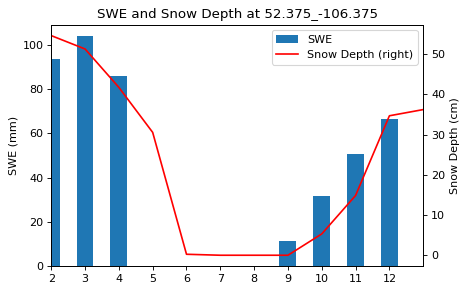

In [2]:
def SWE_plot(snow_f):
    snow_column_names = ["YEAR","MONTH" ,"DAY", "SWE", "SNOW_DEPTH", "SNOW_CANOPY", "ADVECTION", "DELTACC", "SNOW_FLUX", "RFRZ_ENERGY"]
    df_snow = pd.read_csv(snow_f, sep='\t', names = snow_column_names)
    df_snow = df_snow.astype(float)
    dates = pd.date_range('1980-01-01', periods=len(df_snow), freq="D")
    df_snow.index = dates    
    # Plot of SWE 
    plt.figure(dpi=80);
    df_snow.SWE.groupby(dates.month).max().plot(kind='bar', secondary_y=False, label="SWE", legend=True); plt.ylabel("SWE (mm)");# plt.legend()
    df_snow.SNOW_DEPTH.groupby(dates.month).max().plot(color="r",  secondary_y=True, label="Snow Depth", legend=True);
    plt.ylabel("Snow Depth (cm)");plt.xlabel("Months"); plt.title("SWE and Snow Depth at "+ "_".join(snow_f.split("_")[-2:]));
    save_name = "SWE_"+"_".join(snow_f.split("_")[-2:])+".png";
    plt.savefig(save_name)
    return save_name

snow_f = "/home2/svimal/Projects/VIC/Canada/Results/snow_52.375_-106.375"
SWE_plot(snow_f)

In [184]:
files = glob.glob("/home2/svimal/Projects/VIC/Canada/Results/*")
snow_files =  [f for f in files if (f[-4] == "." and len(f.split(".")) == 3 and "snow" in f) ]

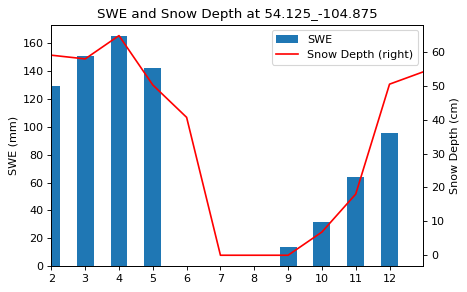

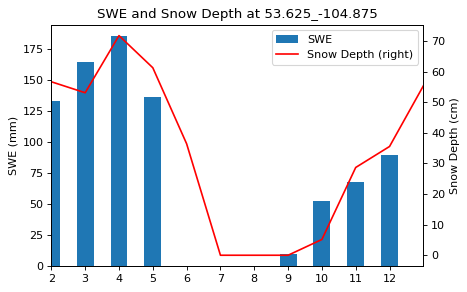

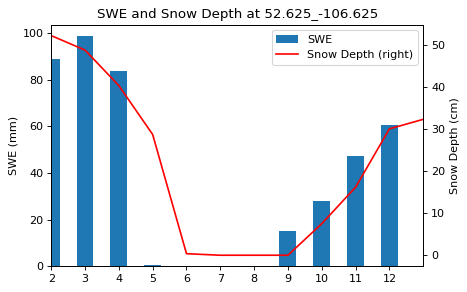

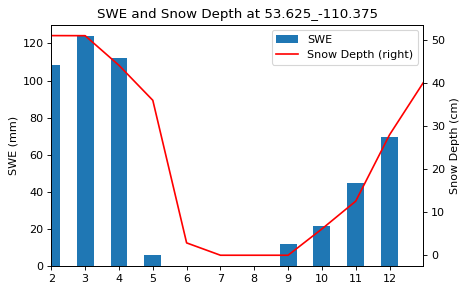

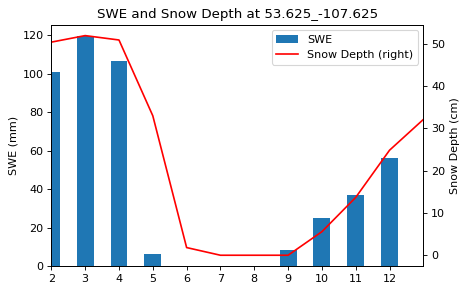

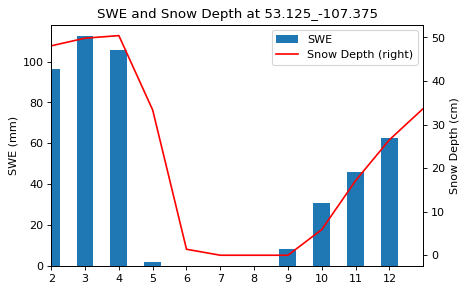

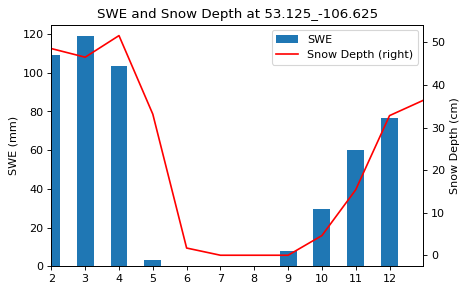

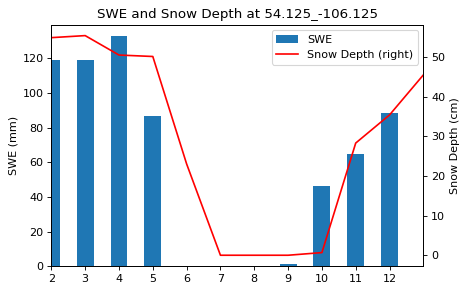

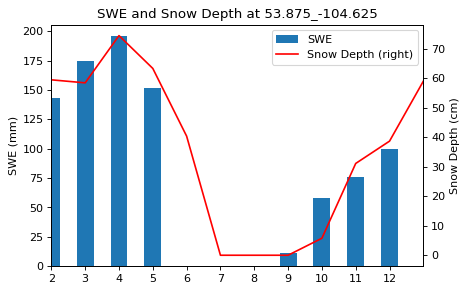

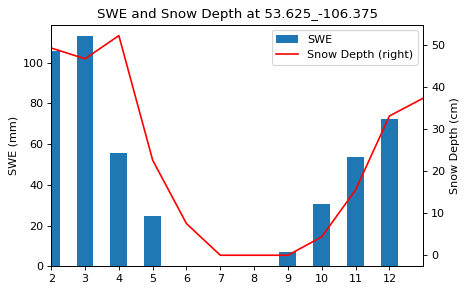

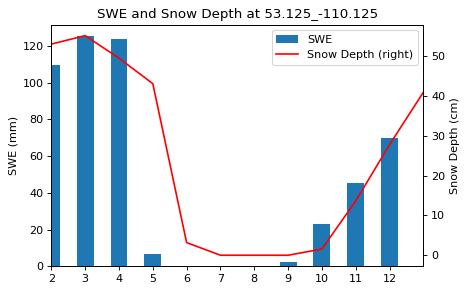

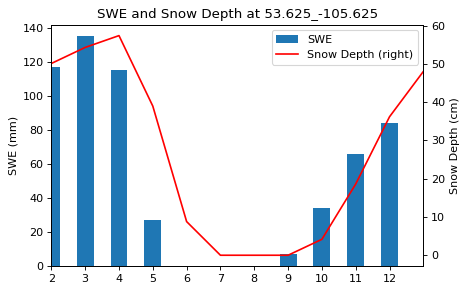

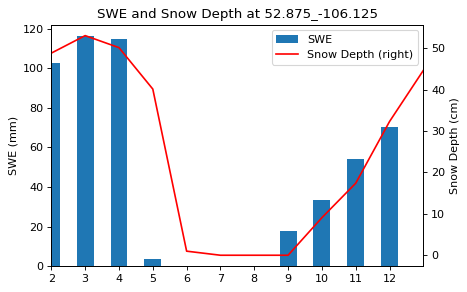

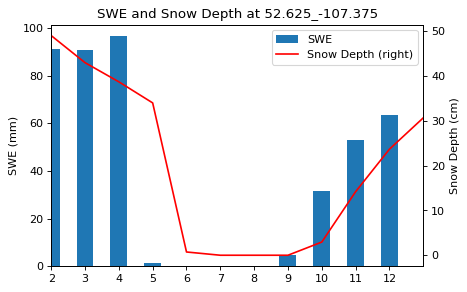

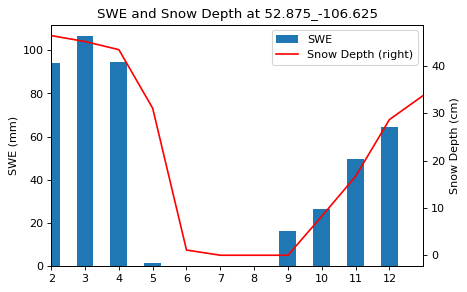

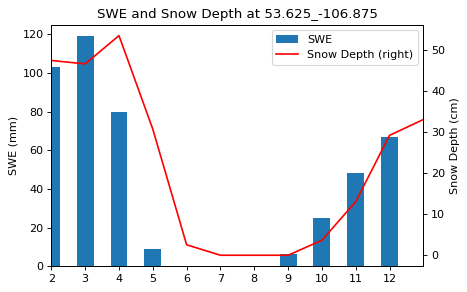

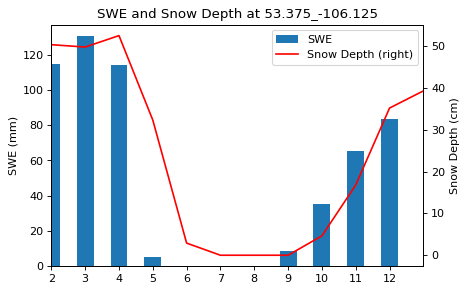

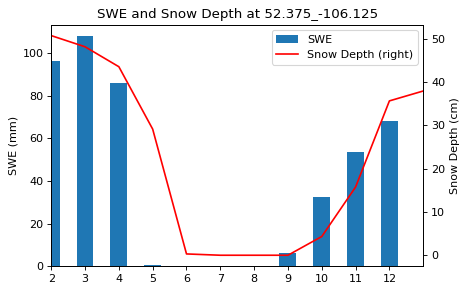

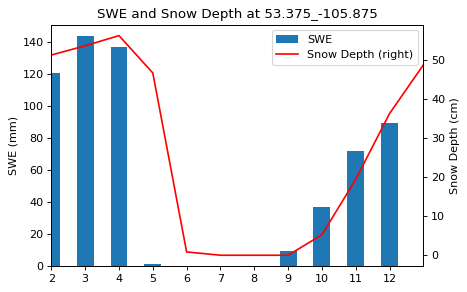

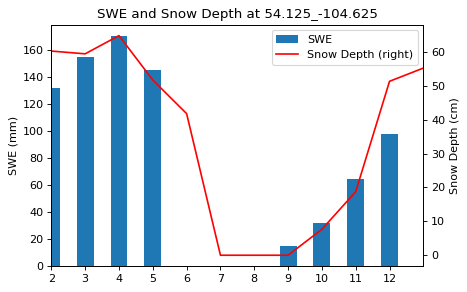

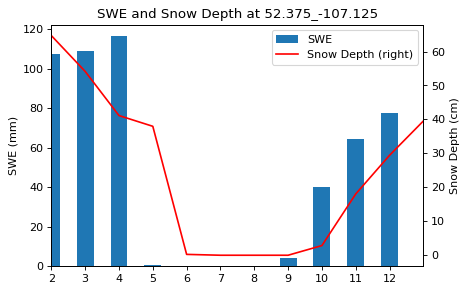

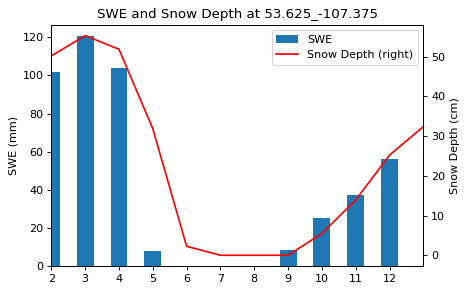

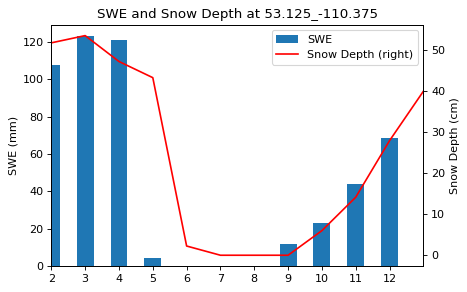

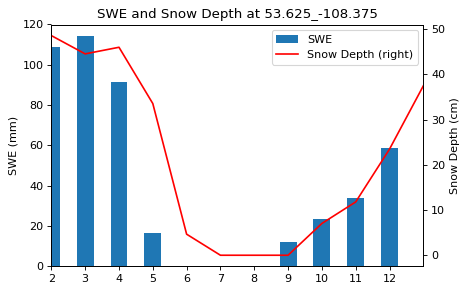

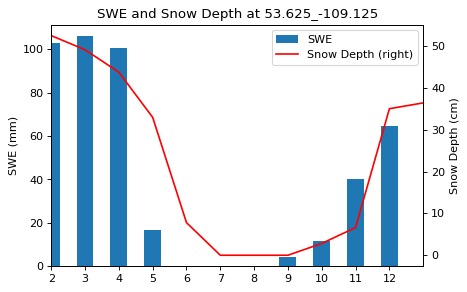

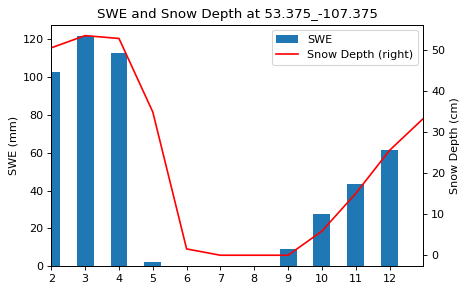

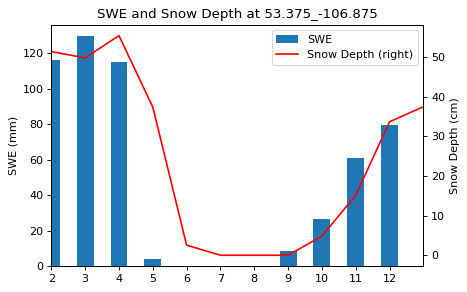

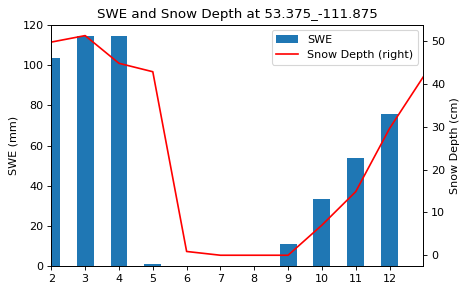

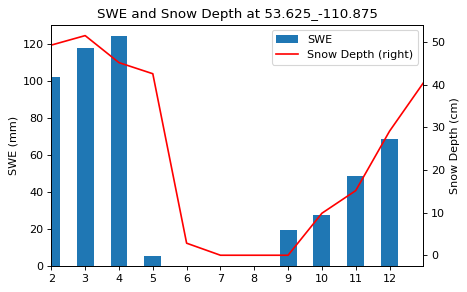

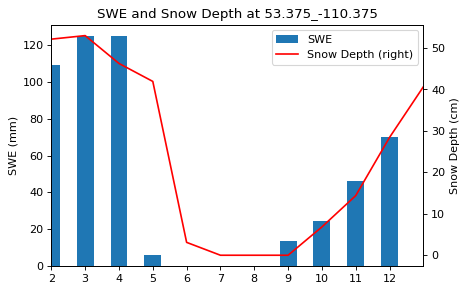

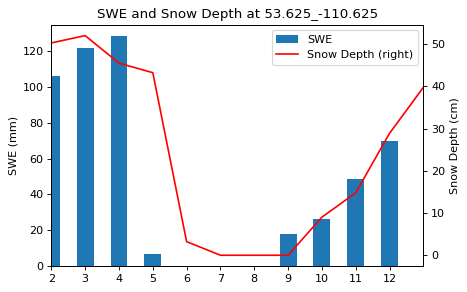

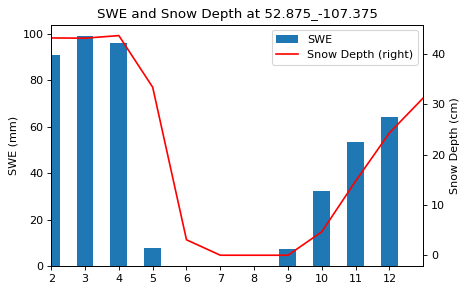

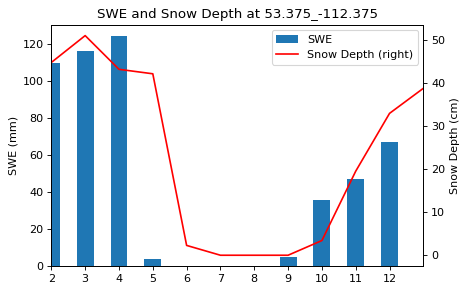

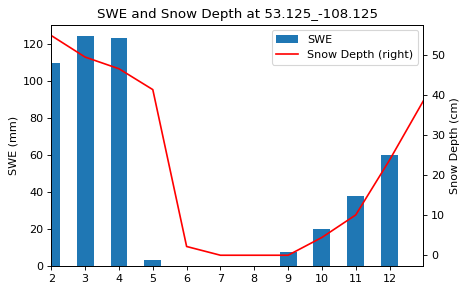

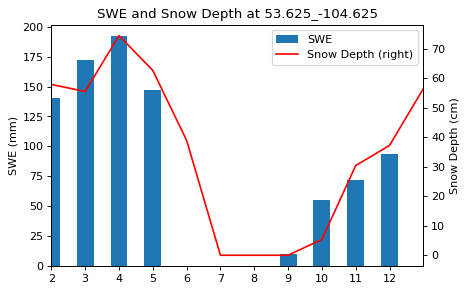

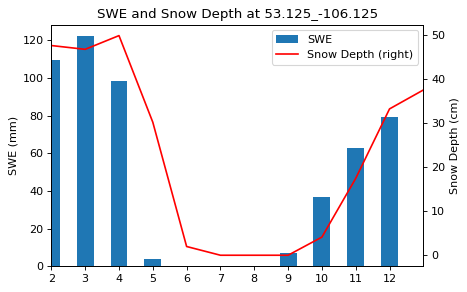

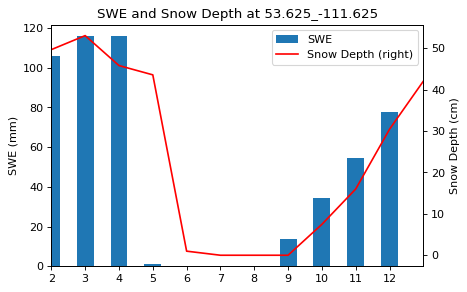

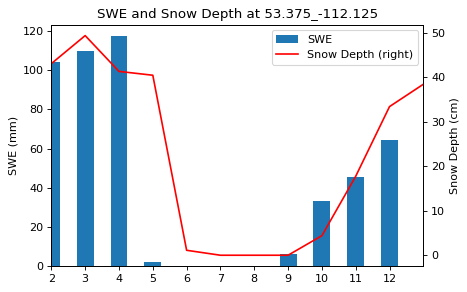

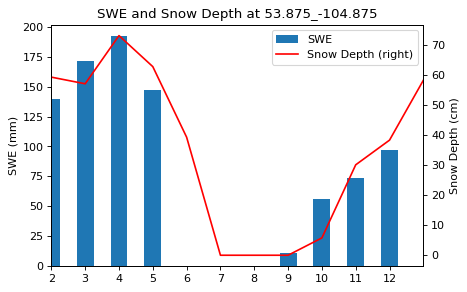

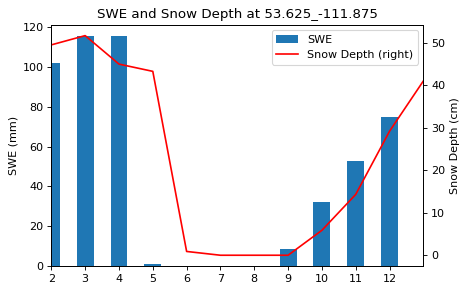

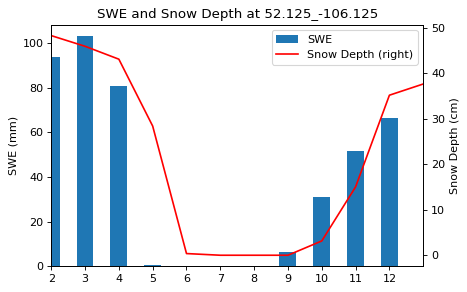

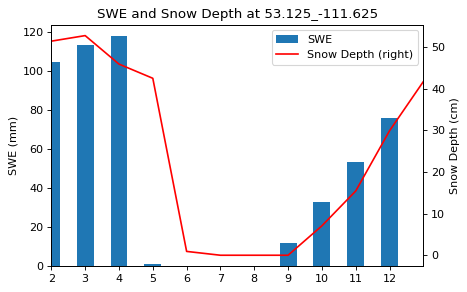

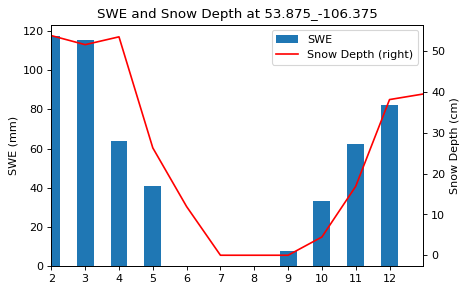

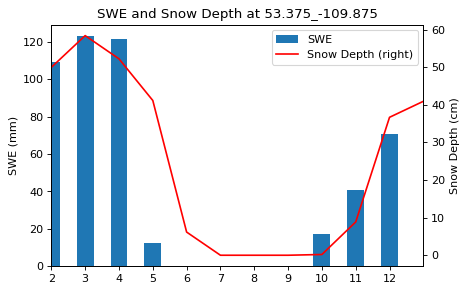

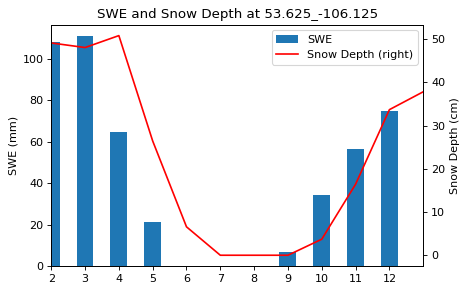

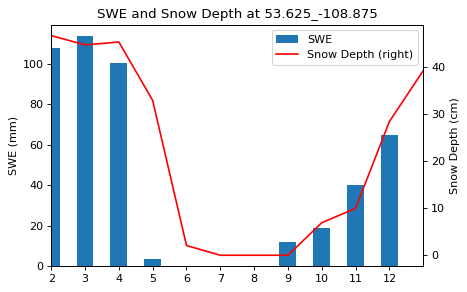

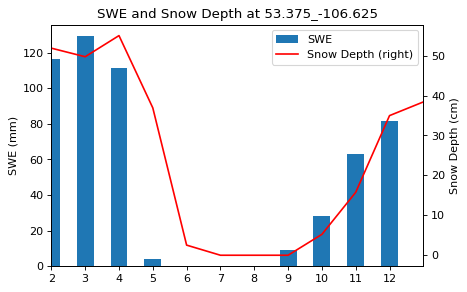

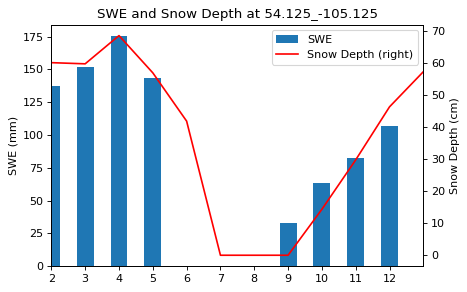

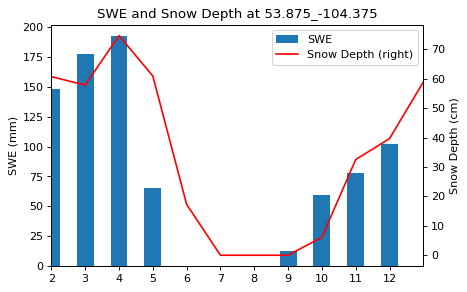

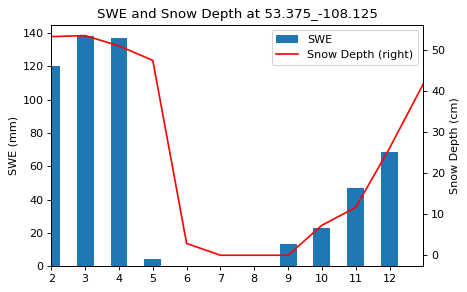

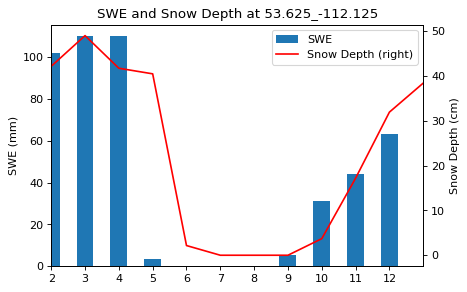

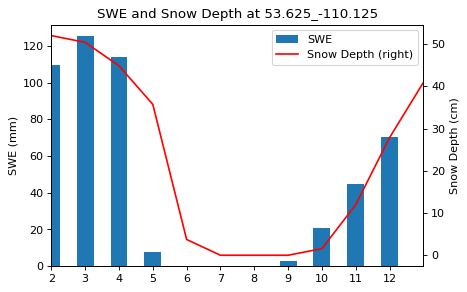

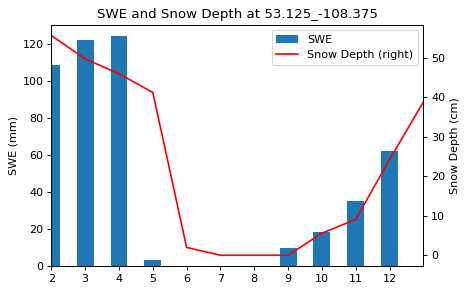

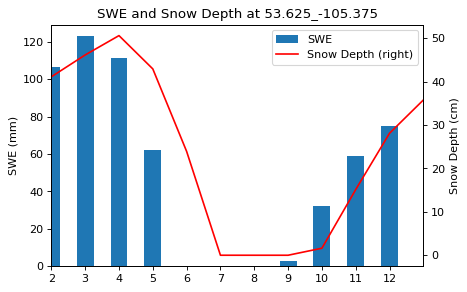

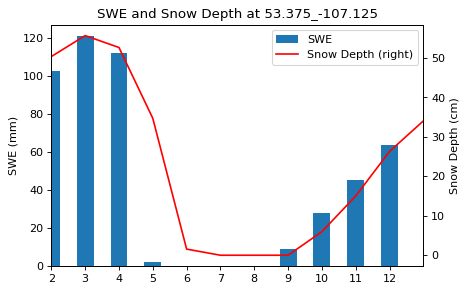

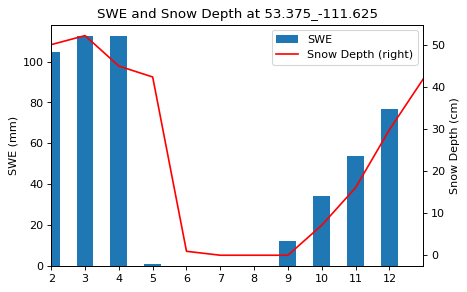

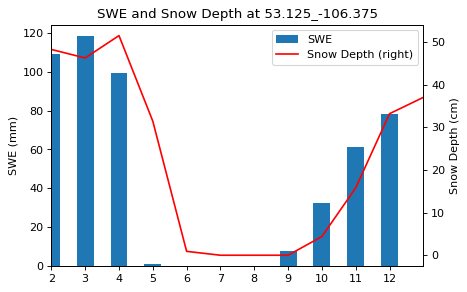

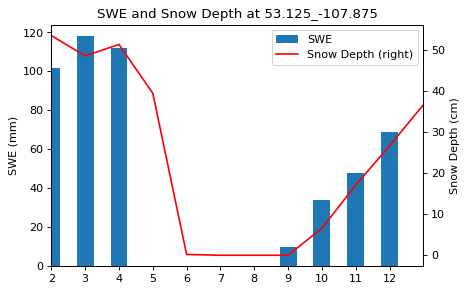

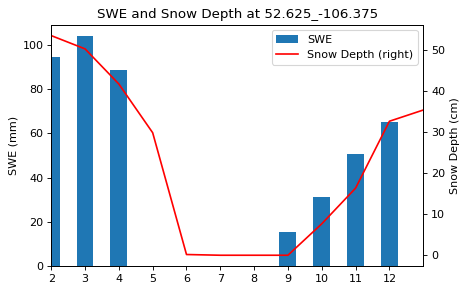

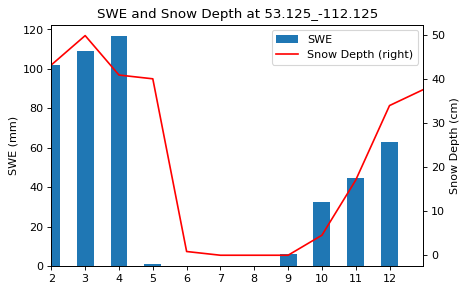

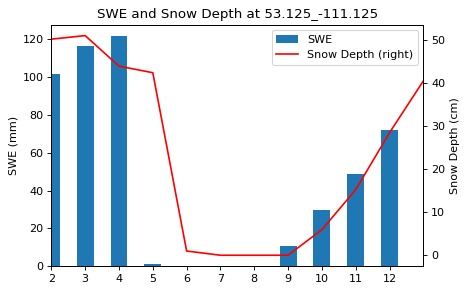

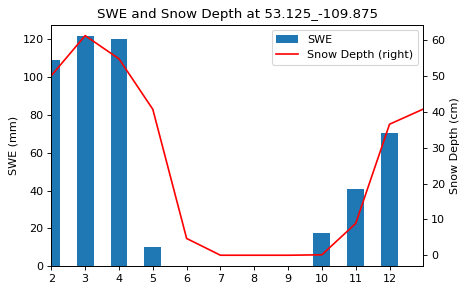

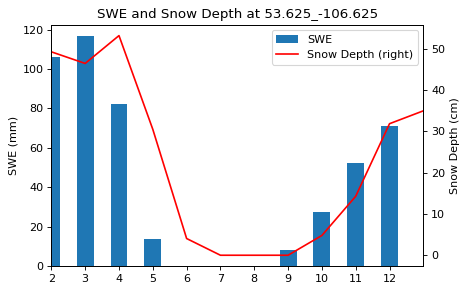

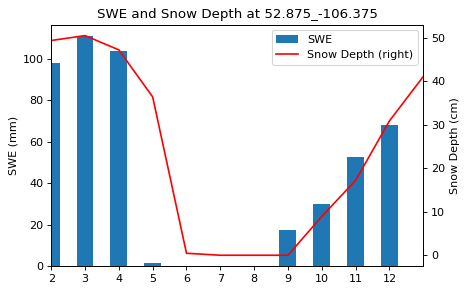

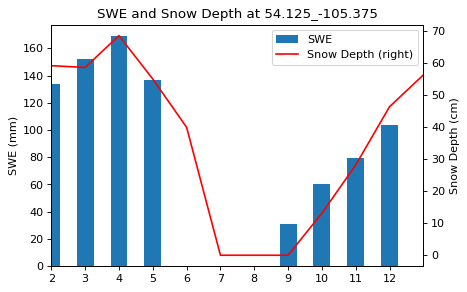

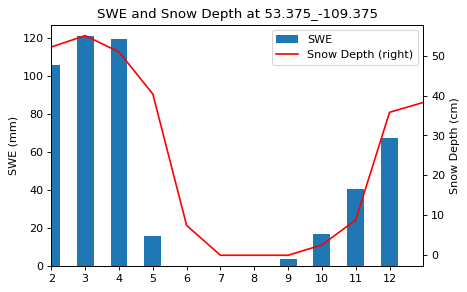

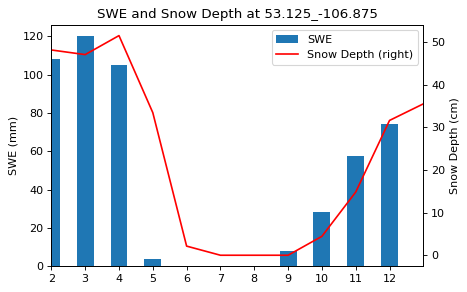

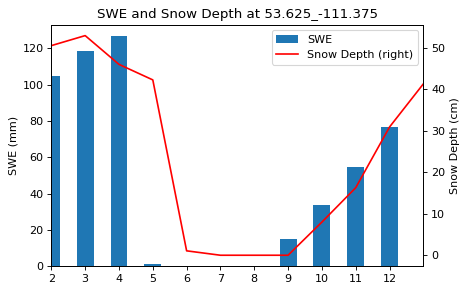

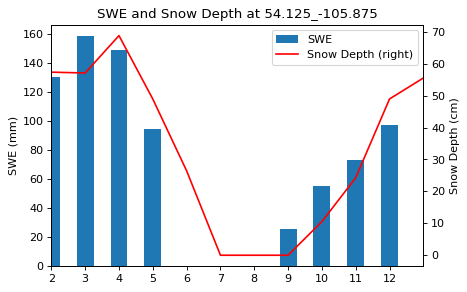

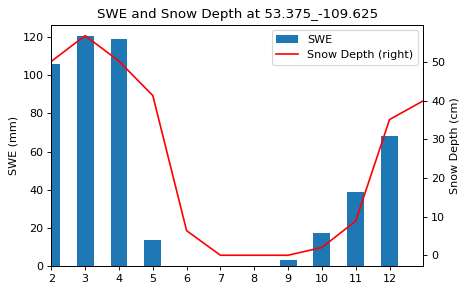

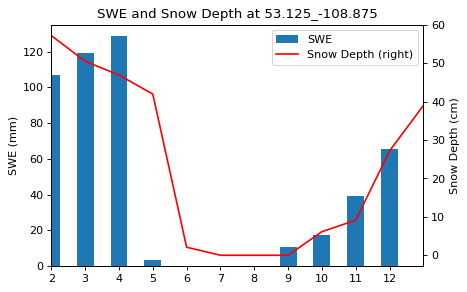

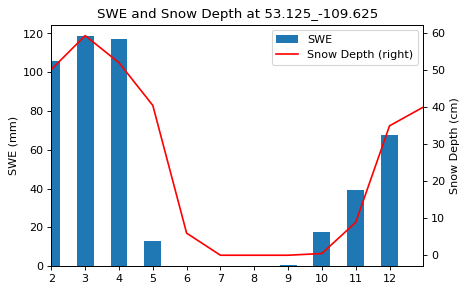

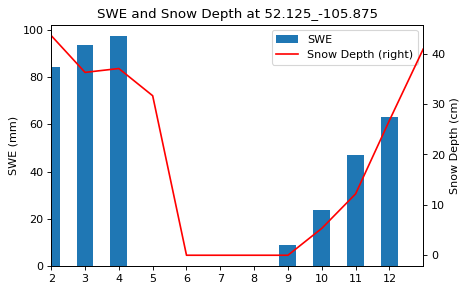

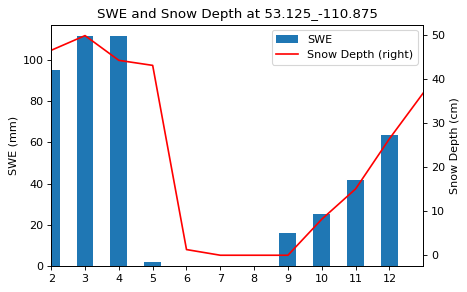

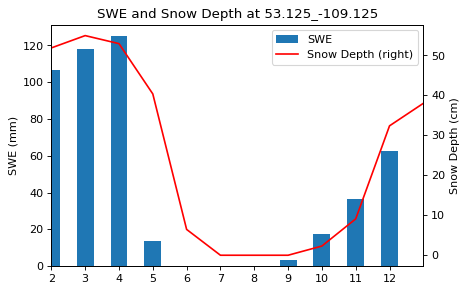

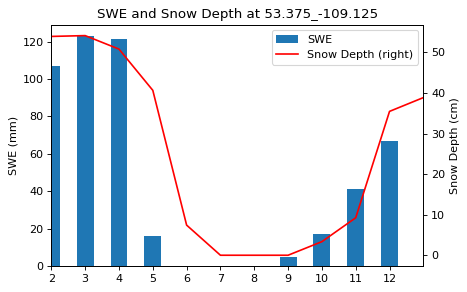

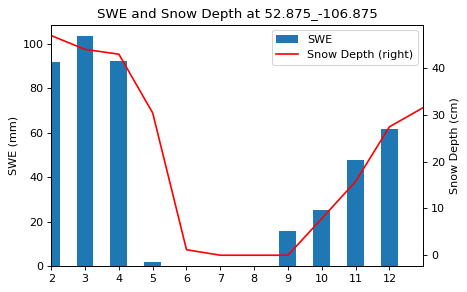

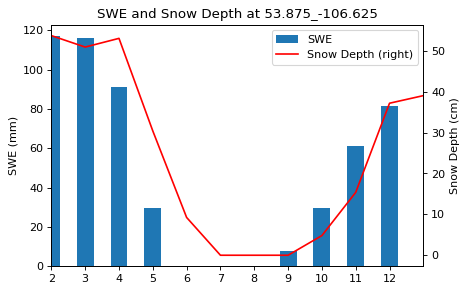

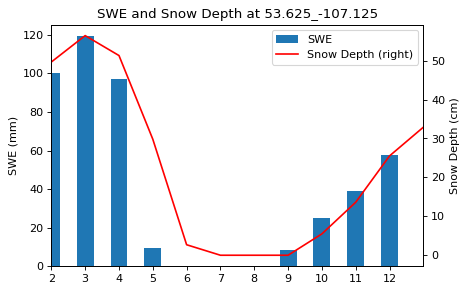

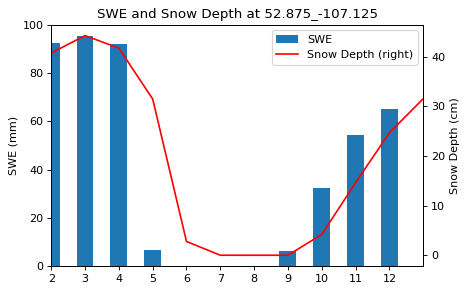

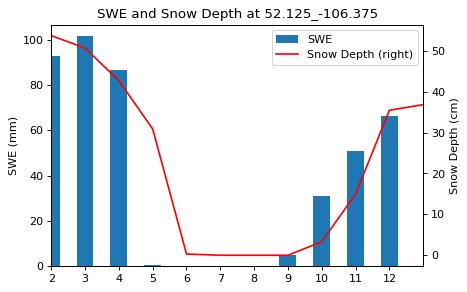

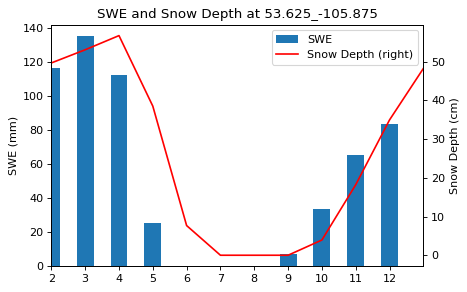

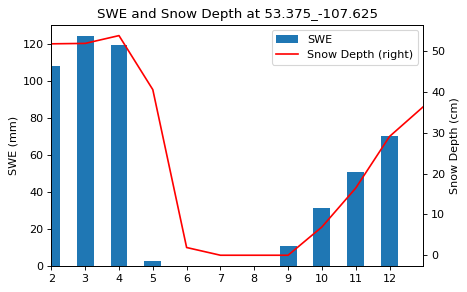

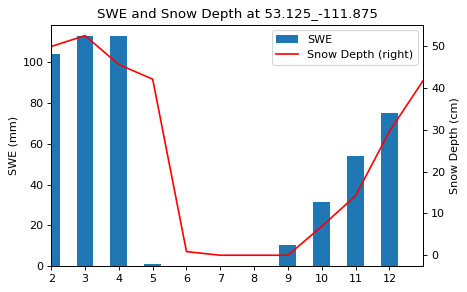

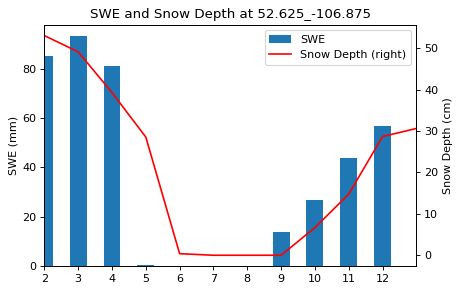

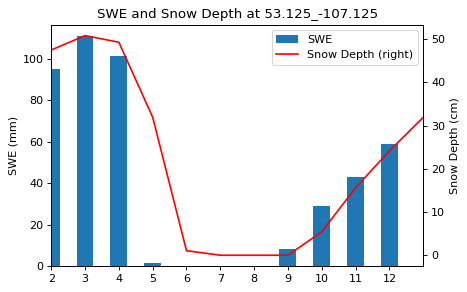

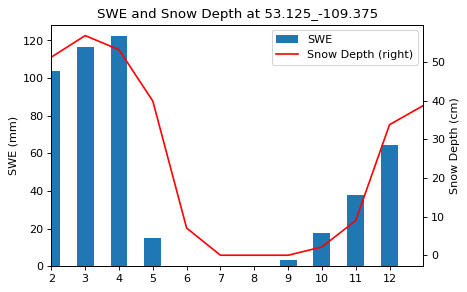

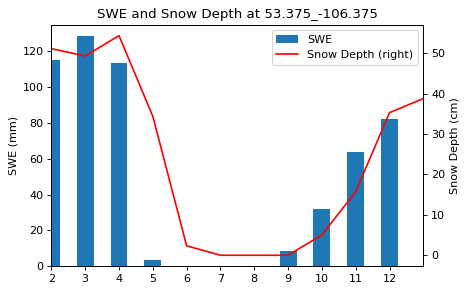

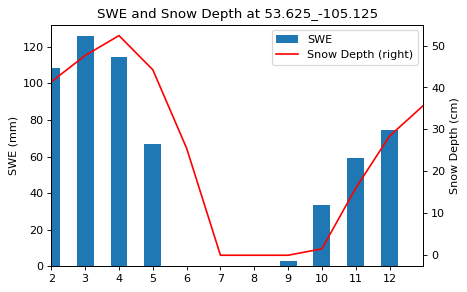

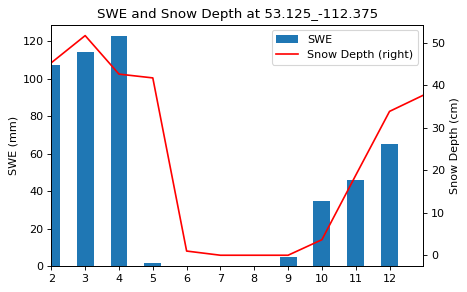

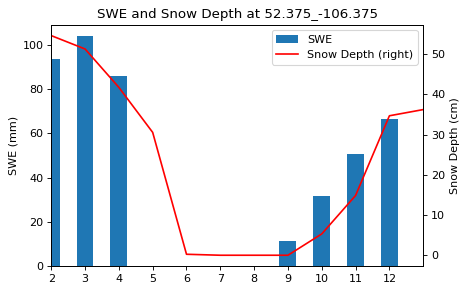

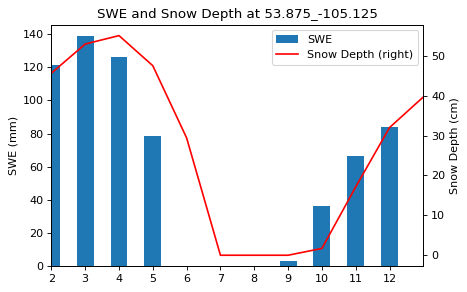

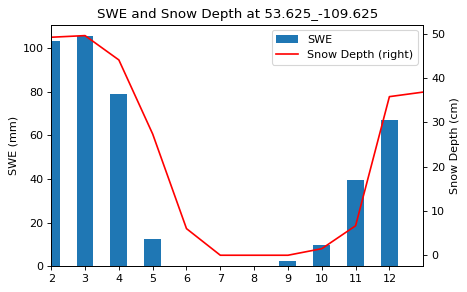

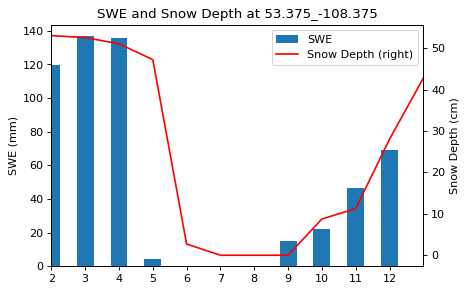

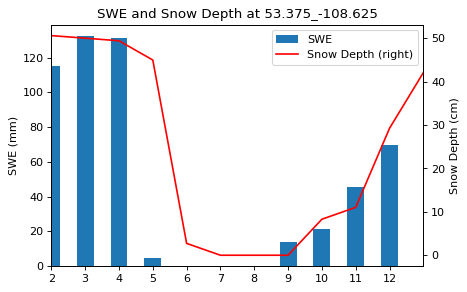

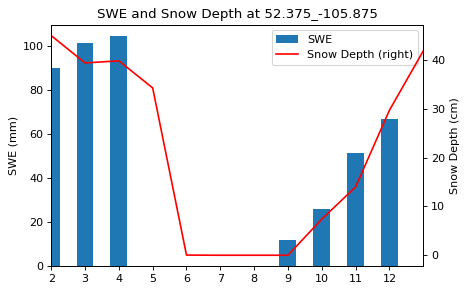

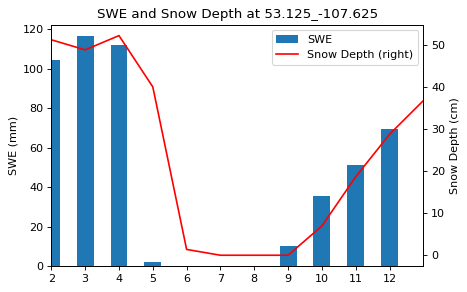

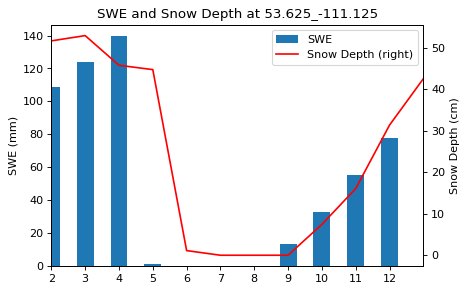

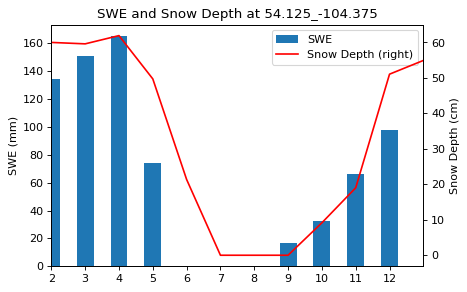

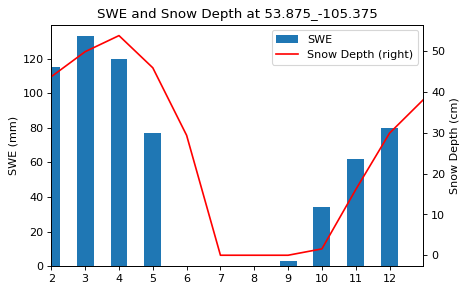

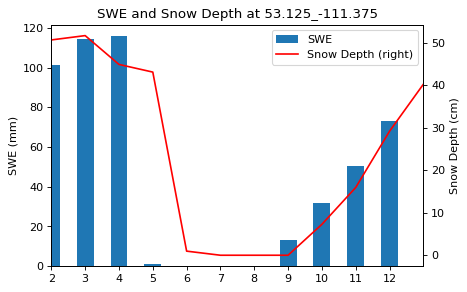

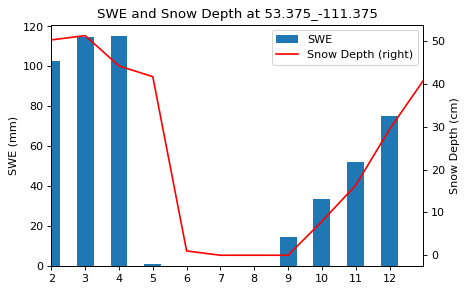

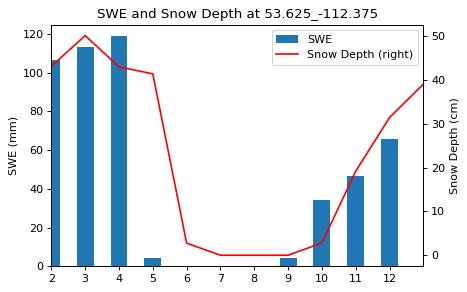

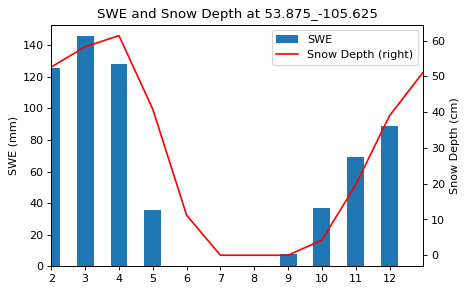

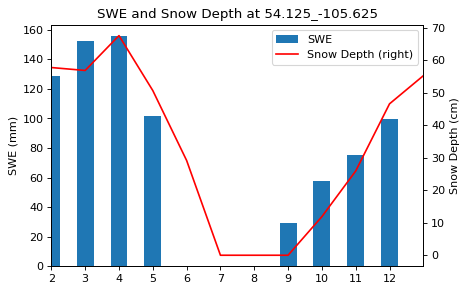

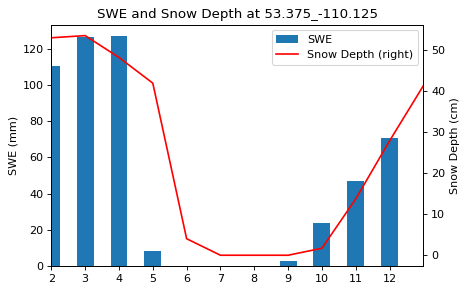

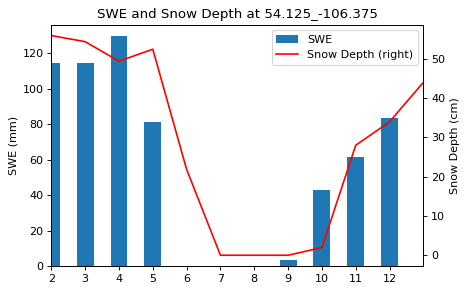

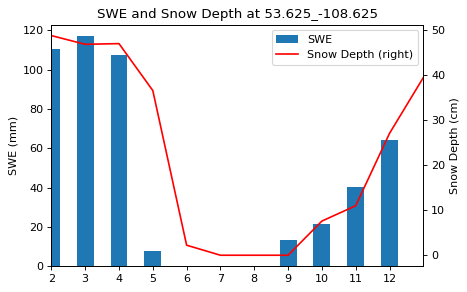

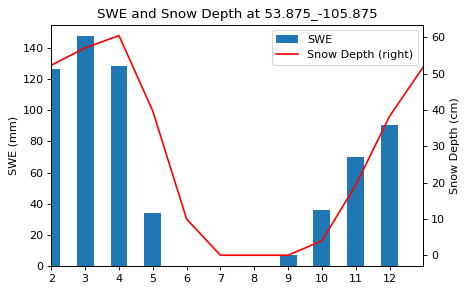

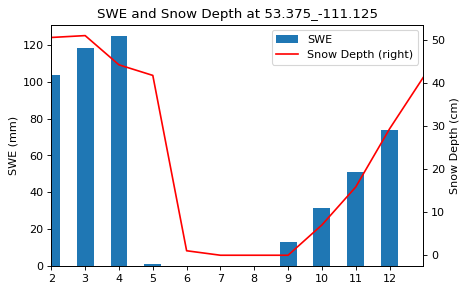

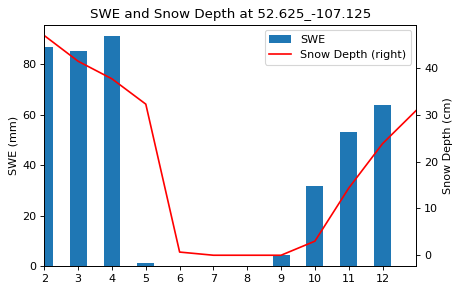

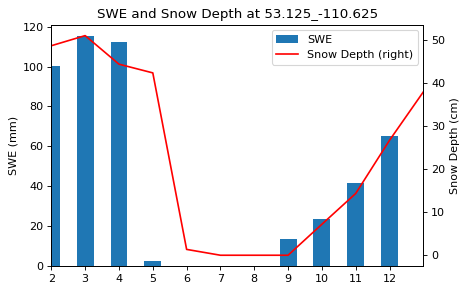

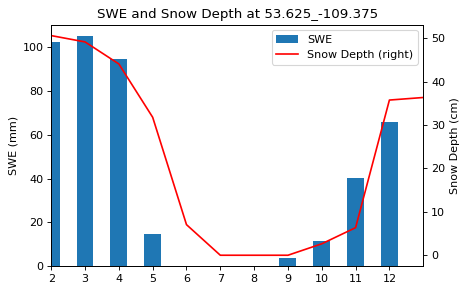

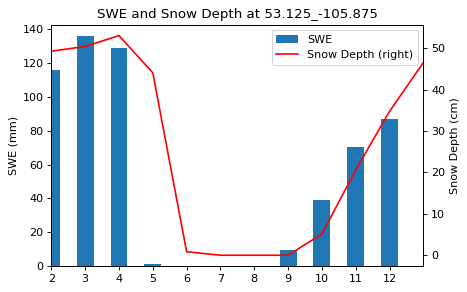

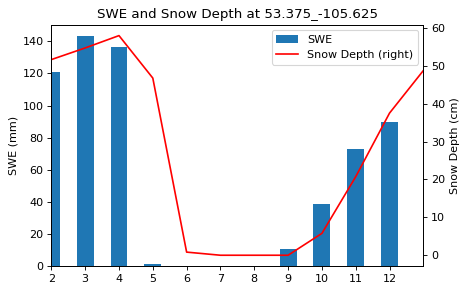

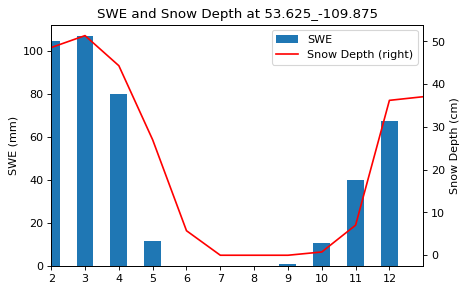

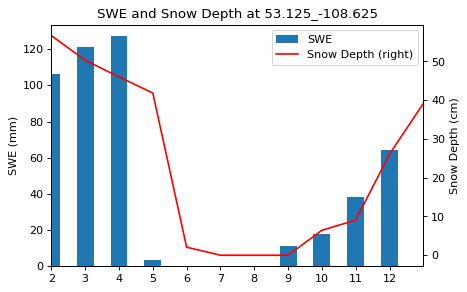

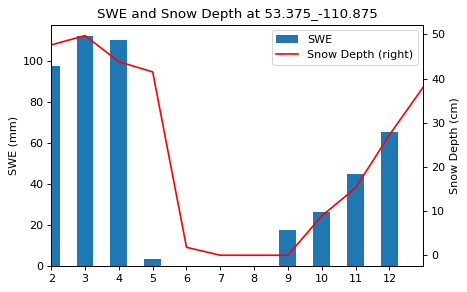

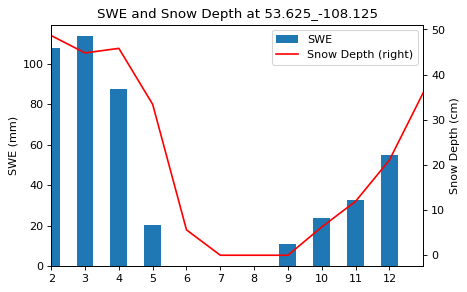

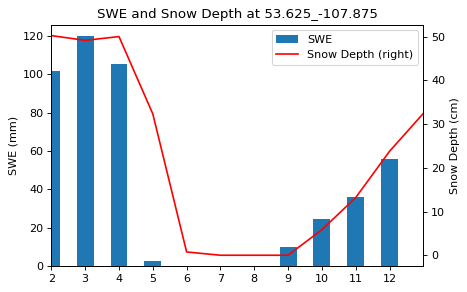

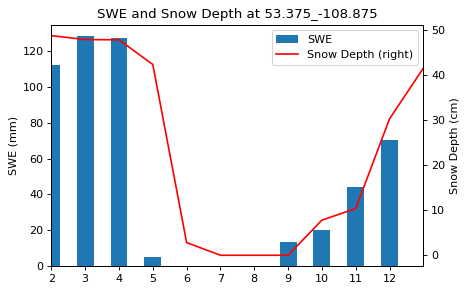

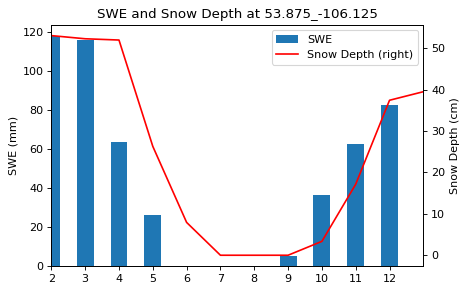

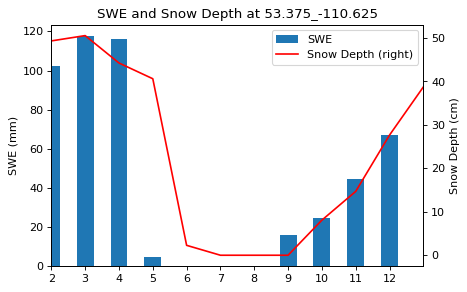

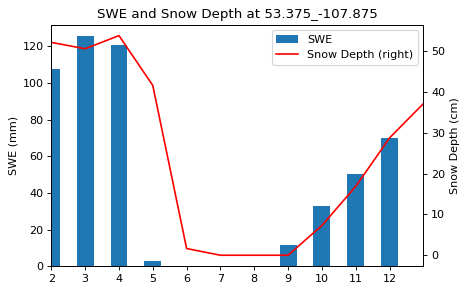

In [183]:
path = "/home2/svimal/Projects/VIC/Canada/Results/"
os.chdir(path)
lons = [-107.375, -107.125]
lats = [52.625, 52.625]
files = glob.glob("/home2/svimal/Projects/VIC/Canada/Results/*")
snow_files =  [f for f in files if (f[-4] == "." and len(f.split(".")) == 3 and "snow" in f) ]
m = folium.Map(location=[np.mean(lats), np.mean(lons)], zoom_start=7)

for snow_f in snow_files:
    #print snow_f
    SWE_plot(snow_f)
    lat = snow_f.split("_")[-2]
    lon = snow_f.split("_")[-1]
    #print lat, lon
    try:
        #png = make_LAI(lat,lon)
        #png_2 = make_LULC(lat,lon)
        png = 'SWE_{}_{}.png'.format(lat,lon)
        #png_2 = path+"Fluxes_{}_{}.png".format(lon,lat)
        encoded = base64.b64encode(open(png, 'rb').read())
        #encoded2 = base64.b64encode(open(png_2, 'rb').read())
        html = '<img src="data:image/png;base64,{}">'.format
        iframe = IFrame(html(encoded), width=(width*resolution), height=(height*resolution)+90)
        popup = folium.Popup(iframe, max_width=2650)

        #iframe2 = IFrame(html(encoded2), width=(width*resolution), height=(height*resolution)+90)
        #popup2 = folium.Popup(iframe2, max_width=2650)

        icon = folium.Icon(color="green", icon="ok")
        #icon2 =  folium.Icon(color="red", icon="ok")

        marker = folium.Marker(location=[lat, lon], popup=popup, icon=icon)
        #marker2 = folium.Marker(location=[lat+0.025, lon], popup=popup2, icon=icon2)

        marker.add_to(m)
        #marker2.add_to(m)
    except:
        pass

In [186]:
m.save('SWE_and_SnowDepth.html')

In [185]:
os.getcwd()

'/home2/svimal/Projects/VIC/Canada/Results'

In [187]:
f = "/home2/svimal/Data/Canada/BERMS/FLUXNET_Canada_1335/data/SK-OldAspen/SK-OldAspen_Meteorology/Main/SK-OA_FlxTwr_Met2_"
import glob, os    
obs = pd.concat(map(pd.read_csv, glob.glob(f+"*")))
obs.SnowDepth_Clrng.head(5)
obs.drop(0,axis=0, inplace=True)
obs = obs.fillna(0)
obs = obs[obs.Year !=0 ]

obs["date"] = pd.to_datetime(obs.Year.astype(int), format="%Y") + \
            pd.to_timedelta(obs.Day.astype(int)-1, unit="d") + pd.to_timedelta(obs.End_Time.astype(int), unit = "m")
obs.index = obs.date

DatetimeIndex(['2007-07-01 00:30:00', '2007-07-01 01:40:00',
               '2007-07-01 02:10:00', '2007-07-01 03:20:00',
               '2007-07-01 03:50:00', '2007-07-01 05:00:00',
               '2007-07-01 05:30:00', '2007-07-01 06:40:00',
               '2007-07-01 07:10:00', '2007-07-01 08:20:00',
               ...
               '2000-02-01 08:10:00', '2000-02-01 09:20:00',
               '2000-02-01 09:50:00', '2000-02-01 11:00:00',
               '2000-02-01 11:30:00', '2000-02-01 12:40:00',
               '2000-02-01 13:10:00', '2000-02-01 14:20:00',
               '2000-02-01 14:50:00', '2000-02-01 16:00:00'],
              dtype='datetime64[ns]', name=u'date', length=262992, freq=None)

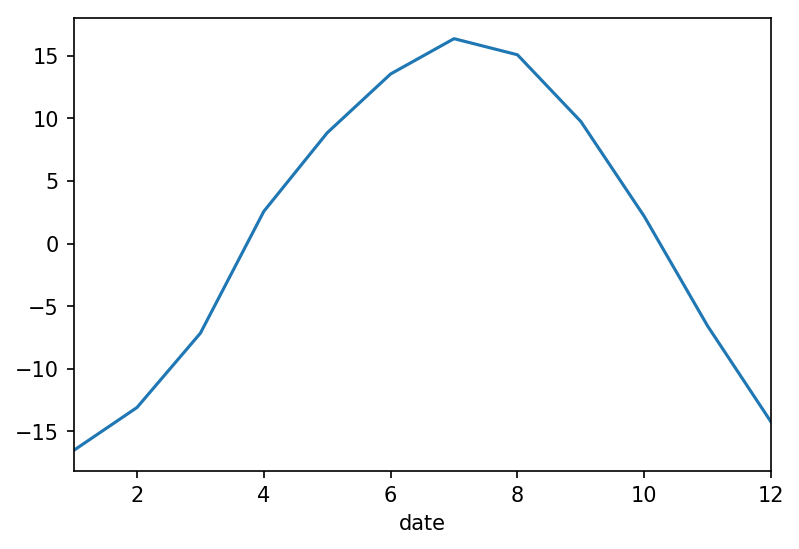

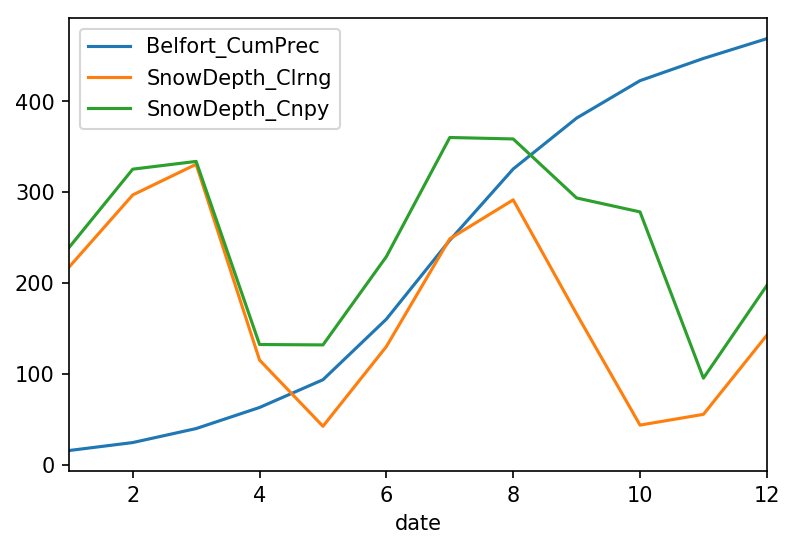

In [188]:
a = obs["AirTemp_AbvCnpy_37m,AirTemp_Cnpy_18m,AirTemp_AbvUndStry_4m,AirTemp_UndStry_1m,\
MetOne_RelHum_AbvCnpy_36m,RelHum_AbvCnpy_37m,RelHum_Cnpy_18m,RelHum_AbvUndStry_4m,RelHum_UndStry_1m,WindSpd_AbvCnpy_38m,WindDir_AbvCnpy_38m,StdDev_WindDir_AbvCnpy_38m,SurfPress,Belfort_CumPrec,TBRG_Rain,SnowDepth_Clrng,SnowDepth_Cnpy".split(",")]
a = a.astype(float)
a = a[a > -200]
plt.figure(1,dpi=150)
a.AirTemp_UndStry_1m.groupby([a.index.month]).mean().plot();
plt.figure(3,dpi=150)
a.Belfort_CumPrec.groupby([a.index.month]).mean().plot();
a.SnowDepth_Clrng.groupby([a.index.month]).mean().plot();
a.SnowDepth_Cnpy.groupby([a.index.month]).mean().plot();plt.legend()
#obs
a.index
#obs

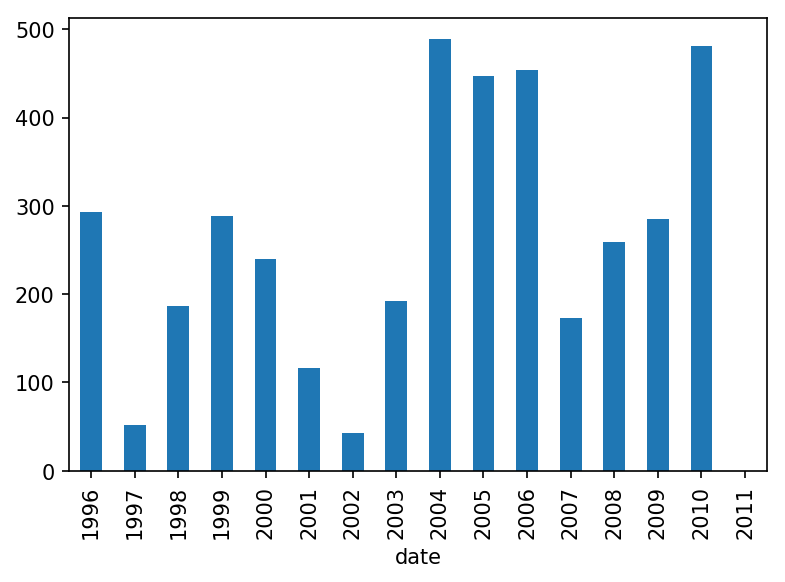

In [189]:
plt.figure(2,dpi=150)
a.TBRG_Rain.groupby([a.index.year]).sum().plot.bar();